# Data Analysis


## Import the parser and create the dataframe

In [10]:
from markdown.parser import DataParser
from markdown.cleaning import CleanData
import markdown.toolkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data = CleanData().get_clean_data()

In [47]:
data.dropna()

,cible,sous_cible,sexe,categorie,macro_categorie,nom_ref,coloris,matiere,saisonnalite,pvc_france,...,ca_net_ttccumuln,taux_de_remisecumuln,qte_venduescumuln,nb_rcten_venten,nb_pdvavec_rc_en_venten,aine_1ere_vten,tx_ecoulcumuln,stk_dispoentrepotn,stk_hors_dispopour_reassortn,%
0,2-ENFANT,PETIT,FE,JOUR,Enfant Jour,LOUPIOTE,COQ/MU,Autres,Hiver,129,...,85359,41.34,1128,7,133,2020-S36,36,637,634,50
1,2-ENFANT,PETIT,MA,JOUR,Enfant Jour,LOOKY,SMOKIN,Toile (fil à fil pilou),Hiver,55,...,151368,36.36,4160,7,144,2020-S36,83,127,124,50
2,1-BEBE,BEBE Debout,MA,JOUR,Bébé Debout,LESS,SMOKIN,Interlock ouatiné,Hiver,29.9,...,111323,17.00,3992,5,161,2020-S36,69,0,-9,30
3,2-ENFANT,PETIT,MA,JOUR,Enfant Jour,LOUNO,SMO/TE,Autres,Hiver,129,...,167903,34.89,1999,7,134,2020-S36,68,187,184,50
4,2-ENFANT,PETIT,FE,NUIT,Enfant Nuit,LIMANDE,MAR/MU,Molleton,Hiver,35.9,...,29549,29.09,1093,8,1,2020-S35,38,1989,1948,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15544,1-BEBE,BEBE Couché,MI,JOUR,Bébé couché,FACETTE,MARSHM,Tubique bio,Reconduit,39.9,...,31487,6.17,841,5,130,2020-S01,98,0,0,0
15545,2-ENFANT,PETIT,FE,JOUR,Enfant Jour,CORNILLE,SMO/OR,Côte 1/1,Reconduit,29.9,...,2991,17.76,110,7,65,2020-S01,58,0,0,0
15546,1-BEBE,BEBE Couché,MI,JOUR,Bébé couché,CABALERO,TOUDOU,Tricot bio,Reconduit,39.9,...,1151,3.86,30,3,26,2020-S01,97,0,0,0
15547,2-ENFANT,PETIT,MA,JOUR,Enfant Jour,FLIP,SHINE,Jersey,Eté,27.9,...,10394,23.39,471,7,1,2020-S08,98,1,-224,30


## Categorical feature analysis

In [5]:
cat_data = data.iloc()[:,:9]
num_data = data.iloc()[:,9:]

In [35]:
cat_data.describe()

,cible,sous_cible,sexe,categorie,macro_categorie,nom_ref,coloris,matiere,saisonnalite
count,15549,15549,15549,15549,15549,15549,15549,15549,15549
unique,4,6,3,7,10,5565,753,95,4
top,1-BEBE,PETIT,FE,JOUR,Enfant Jour,nan,varian,Côte 1/1,Reconduit
freq,6333,5453,6366,5685,3223,1829,2481,3314,5958


<AxesSubplot:xlabel='cible', ylabel='qte_venduescumuln'>

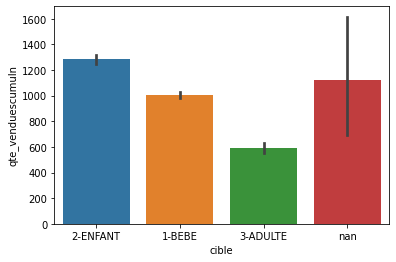

In [43]:
sns.barplot(x="cible",y="qte_venduescumuln",data=data)

<AxesSubplot:xlabel='sous_cible', ylabel='qte_venduescumuln'>

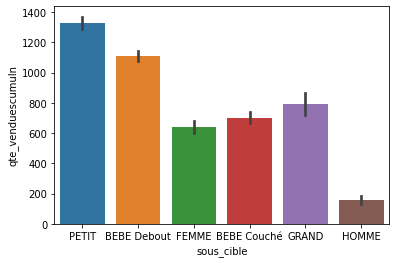

In [48]:
sns.barplot(x="sous_cible",y="qte_venduescumuln",data=data)

<AxesSubplot:xlabel='sexe', ylabel='qte_venduescumuln'>

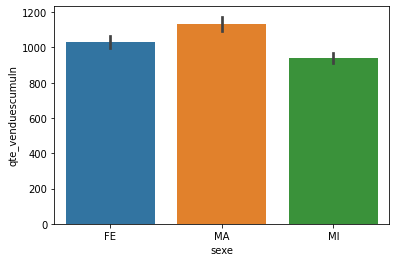

In [49]:
sns.barplot(x="sexe",y="qte_venduescumuln",data=data)

<AxesSubplot:xlabel='categorie', ylabel='qte_venduescumuln'>

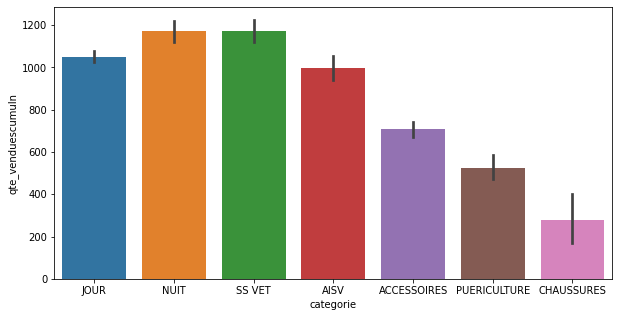

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(x="categorie",y="qte_venduescumuln",data=data)

<AxesSubplot:xlabel='macro_categorie', ylabel='qte_venduescumuln'>

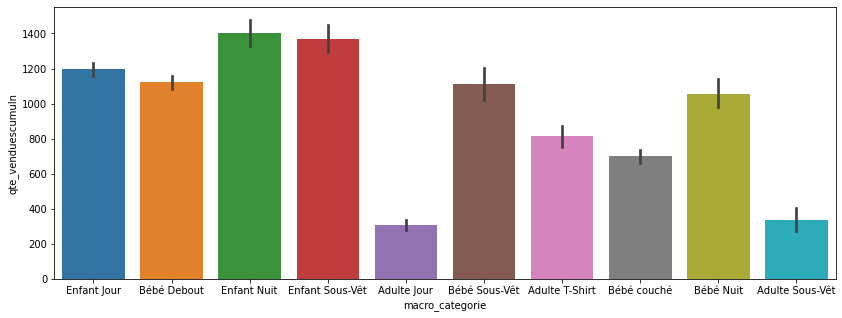

In [52]:
plt.figure(figsize=(14,5))
sns.barplot(x="macro_categorie",y="qte_venduescumuln",data=data)

<AxesSubplot:xlabel='saisonnalite', ylabel='qte_venduescumuln'>

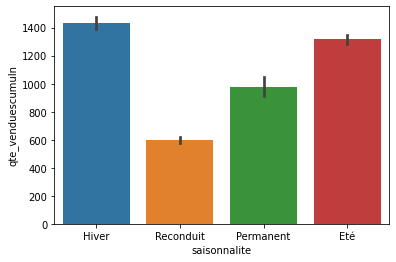

In [55]:
sns.barplot(x="saisonnalite",y="qte_venduescumuln",data=data)

Categorical features to drop: 

In [56]:
cat_drop_list = ["cible", "nom_ref", "coloris", "matiere"]

## Numerical Feature analysis

In [60]:
num_data.describe().applymap(lambda x: round(x))

,rang,ca_net_ttcn,ca_net_ttc_1n,ca_net_ttc_2n,ca_net_ttc_3n,qte_venduesn,qte_vendues_1n,qte_vendues_2n,qte_vendues_3n,stock_pdvn,stk_transitn,stock_pdv__transit,ca_net_ttccumuln,qte_venduescumuln,nb_rcten_venten,nb_pdvavec_rc_en_venten,stk_dispoentrepotn,stk_hors_dispopour_reassortn,%
count,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549
mean,899,1530,1759,1248,1490,83,88,58,68,447,9,456,24201,1025,4,83,152,135,16
std,421,2653,2912,1880,2271,135,140,85,104,692,23,703,31803,1223,3,67,431,433,18
min,1,-299,-584,-318,-547,-2,-8,-4,-4,-150,0,-150,-834,-6,0,0,-31,-2706,0
25%,556,0,0,0,0,0,0,0,0,0,0,0,1768,81,3,3,0,0,0
50%,1079,199,453,444,559,10,23,22,26,107,0,108,12628,590,5,98,0,0,20
75%,1204,2160,2466,1761,2047,123,124,84,92,718,7,730,35559,1565,7,150,50,34,30
max,2473,35302,46410,23292,27005,1297,1644,915,1042,17304,642,17304,455286,14057,11,171,7148,7148,50


<AxesSubplot:xlabel='ca_net_ttcn', ylabel='qte_venduesn'>

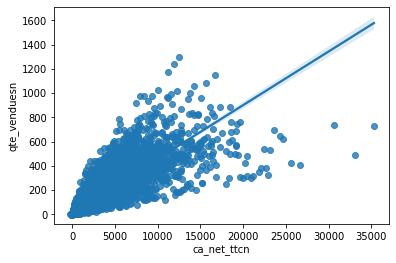

In [78]:
sns.regplot(x="ca_net_ttcn",y="qte_venduesn",data=num_data)

<AxesSubplot:xlabel='stock_pdvn', ylabel='qte_venduesn'>

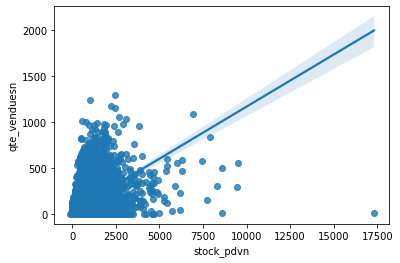

In [79]:
sns.regplot(x="stock_pdvn",y="qte_venduesn",data=num_data)

<AxesSubplot:xlabel='stk_transitn', ylabel='qte_venduesn'>

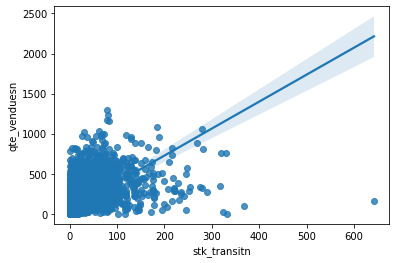

In [80]:
sns.regplot(x="stk_transitn",y="qte_venduesn",data=num_data)

<AxesSubplot:xlabel='stk_dispoentrepotn', ylabel='qte_venduesn'>

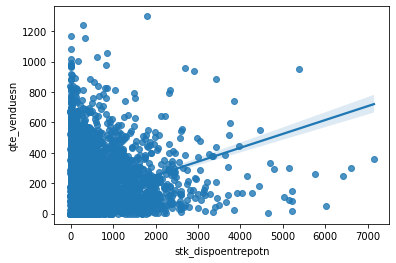

In [81]:
sns.regplot(x="stk_dispoentrepotn",y="qte_venduesn",data=num_data)